# 01. Data Fetch:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Student Attitude and Behavior.csv") # load the data set

In [ ]:
df.shape

(235, 19)

In [ ]:
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


# 02. Data Cleaning and Prep:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Certification Course                                  235 non-null    object 
 1   Gender                                                235 non-null    object 
 2   Department                                            235 non-null    object 
 3   Height(CM)                                            235 non-null    float64
 4   Weight(KG)                                            235 non-null    float64
 5   10th Mark                                             235 non-null    float64
 6   12th Mark                                             235 non-null    float64
 7   college mark                                          235 non-null    float64
 8   hobbies                                               235 no

=> no coloumn has any missing value because total rows=235

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for nominal features
nominal_cols = ['Certification Course','prefer to study in', 'Gender', 'Department', 'hobbies', 'part-time job']
data_encoded = pd.get_dummies(df, columns=nominal_cols)

# Label Encoding for ordinal features
label_encoder = LabelEncoder()
ordinal_cols = ['Do you like your degree?', 'willingness to pursue a career based on their degree', 'Financial Status']
for col in ordinal_cols:
    data_encoded[col] = label_encoder.fit_transform(df[col])


# Convert 'Travelling Time' to numerical values representing the midpoint of each interval
time_mapping = {
    '0 - 30 minutes': 15,
    '30 - 60 minutes': 45,
    '1 - 1.30 hour': 75,
    '1.30 - 2 hour': 105,
    '2 - 2.30 hour': 135,
    '2.30 - 3 hour': 165,
    'more than 3 hour': 180
}
data_encoded['Travelling Time'] = df['Travelling Time'].map(time_mapping)

# Convert 'social media & video' to numerical values representing the midpoint of each interval
social_media_mapping = {
    '0 Minute': 0,
    '1 - 30 Minute': 15,
    '30 - 60 Minute': 45,
    '1 - 1.30 hour': 75,
    '1.30 - 2 hour': 105,
    'More than 2 hour': 120
}
data_encoded['social medai & video'] = df['social medai & video'].map(social_media_mapping)
#
dst_mapping = {
    '0 - 30 minute':15, '30 - 60 minute':45, '1 - 2 Hour':90, '2 - 3 hour':150,
       '3 - 4 hour':210, 'More Than 4 hour':270}
data_encoded['daily studing time'] = df['daily studing time'].map(dst_mapping)


# Custom encoding function
def custom_encode(stress_level):
    encoding_map = {'Awful': 3,'Bad': 2, 'Good': 1, 'fabulous': 0}
    return encoding_map.get(stress_level, None)

# Apply custom encoding to 'Stress Level' column
data_encoded['Stress Level'] = df['Stress Level'].apply(custom_encode)

# Custom encoding function
def custom_encode_f(financial_status):
    encoding_map = {'Awful': 0,'Bad': 1, 'good': 2, 'Fabulous': 3}
    return encoding_map.get(financial_status, None)
data_encoded['Financial Status'] = df['Financial Status'].apply(custom_encode_f)


# 03. EDA

Summary Statistics:
       Height(CM)  Weight(KG)   10th Mark   12th Mark  college mark  \
count  235.000000  235.000000  235.000000  235.000000    235.000000   
mean   157.402128   60.803830   76.848511   68.775872     70.660553   
std     21.510805   14.895844   13.047560   11.018192     15.727446   
min      4.500000   20.000000    7.400000   45.000000      1.000000   
25%    152.000000   50.000000   70.000000   60.000000     60.000000   
50%    160.000000   60.000000   80.000000   69.000000     70.000000   
75%    170.000000   70.000000   86.250000   76.000000     80.000000   
max    192.000000  106.000000   98.000000   94.000000    100.000000   

       daily studing time  salary expectation  Do you like your degree?  \
count          235.000000        2.350000e+02                235.000000   
mean            79.723404        3.248168e+04                  0.914894   
std             64.036482        1.113146e+05                  0.279636   
min             15.000000        0.00000

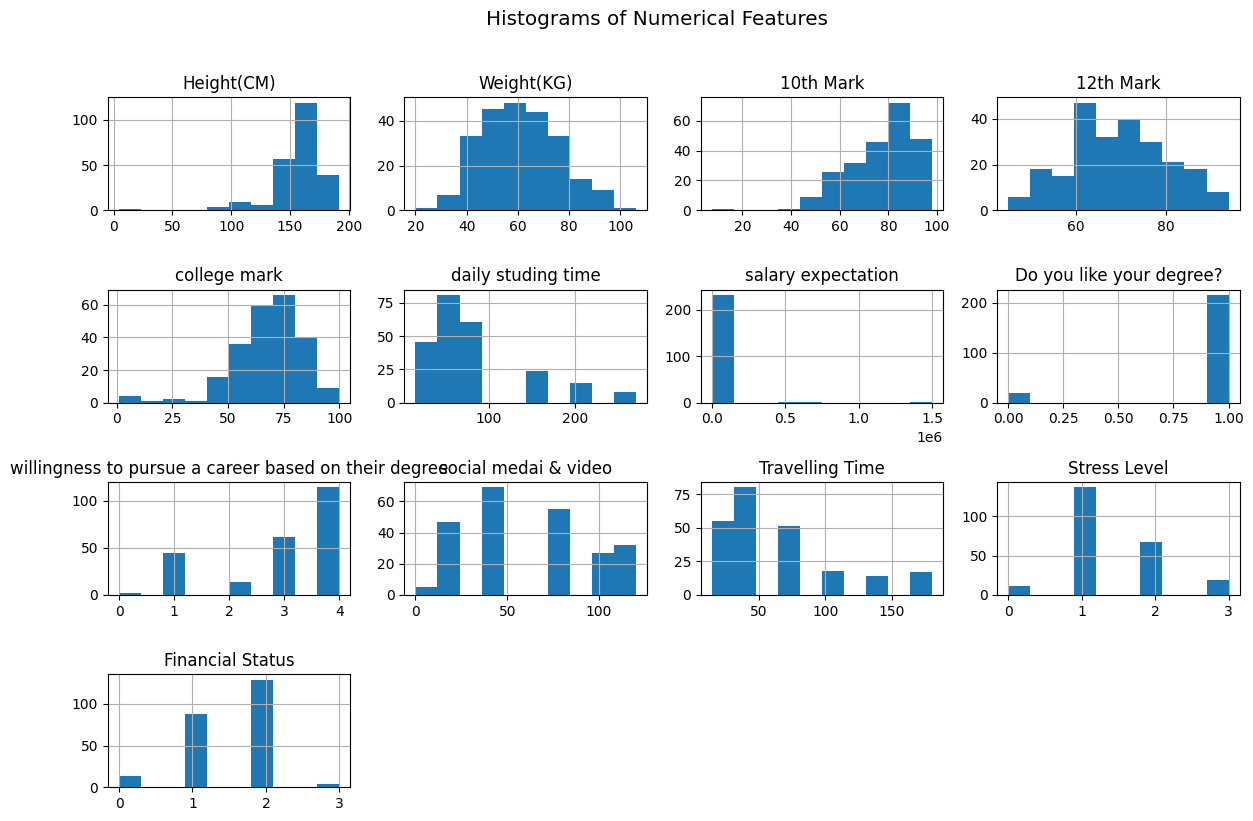

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


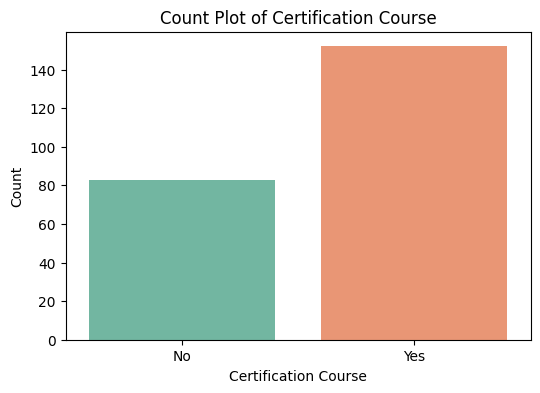

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


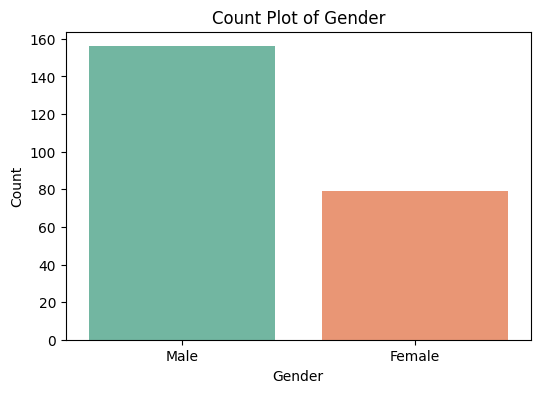

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


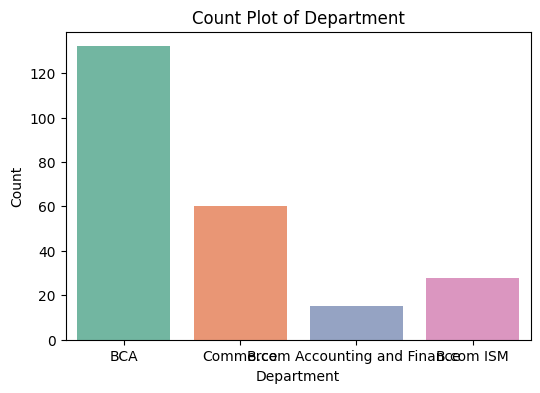

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


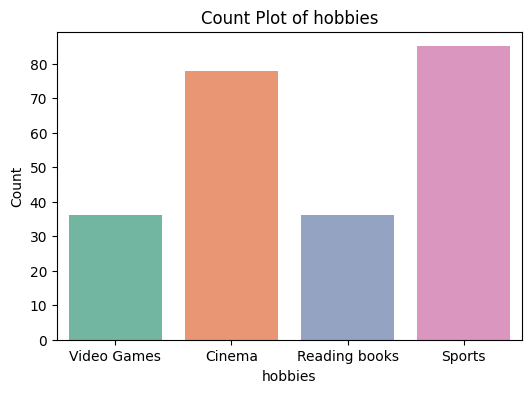

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


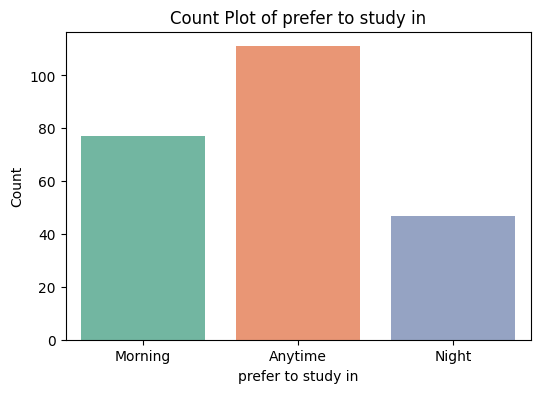

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


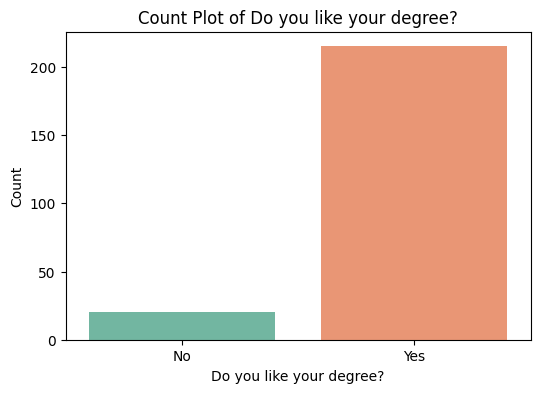

<ipython-input-12-b2195d53827a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


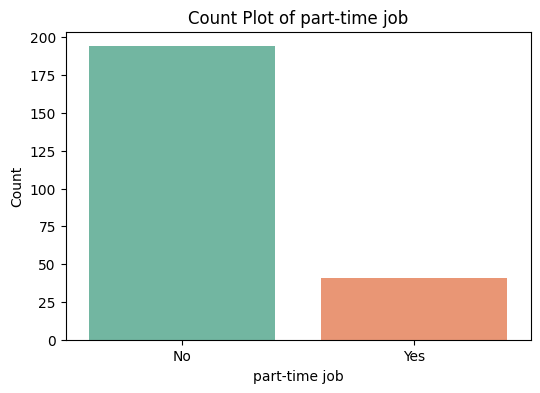

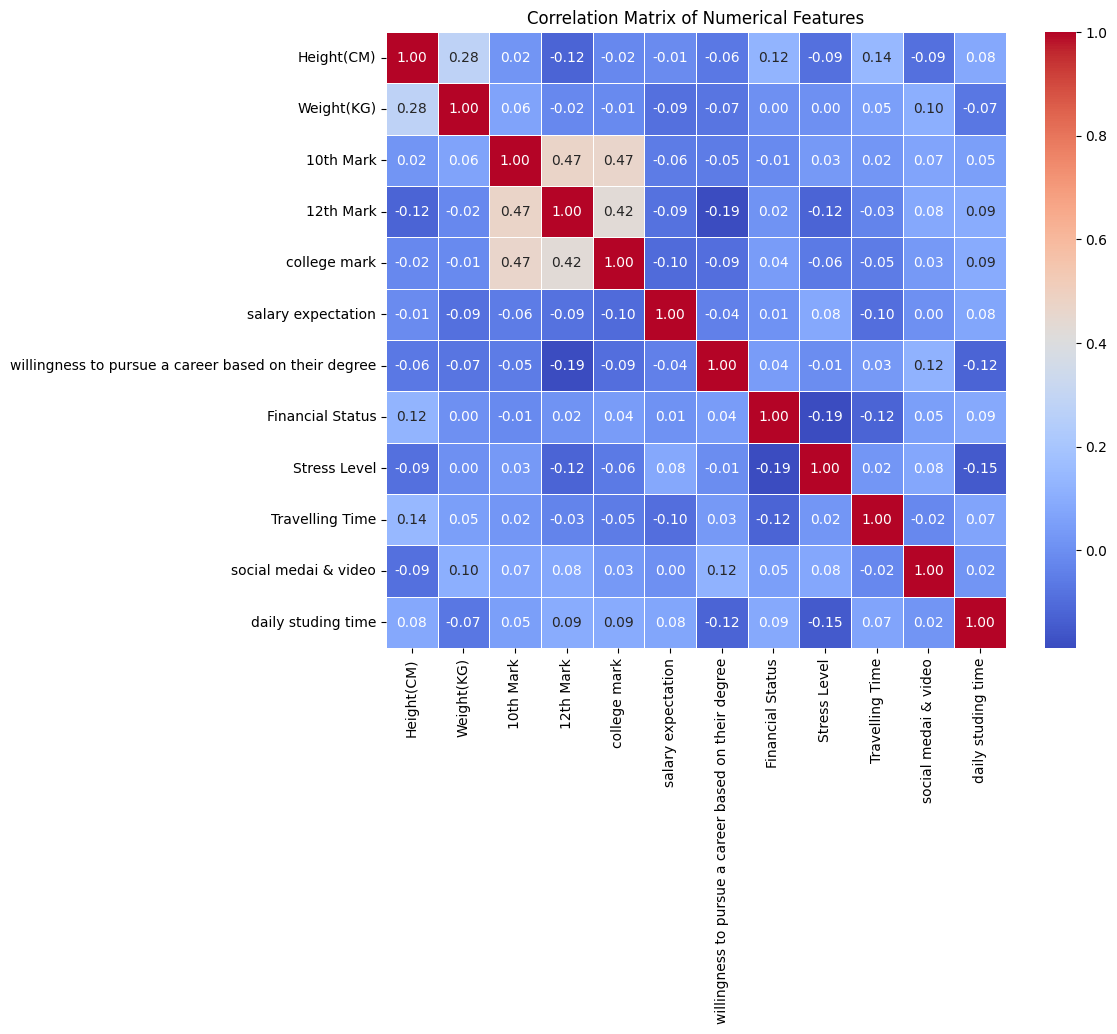

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
summary_stats = data_encoded.describe()
print("Summary Statistics:")
print(summary_stats)

# Distribution Visualization
data_encoded.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.tight_layout()
plt.show()

# Extract correlation features and non-correlation features

corr_features_df= df[['Height(CM)', 'Weight(KG)', '10th Mark', '12th Mark', 'college mark',
                              'salary expectation','willingness to pursue a career based on their degree',
                              'Financial Status','Stress Level','Travelling Time','social medai & video',
                              'daily studing time']]
corr_features_data_encoded= data_encoded[['Height(CM)', 'Weight(KG)', '10th Mark', '12th Mark', 'college mark',
                              'salary expectation','willingness to pursue a career based on their degree',
                              'Financial Status','Stress Level','Travelling Time','social medai & video',
                              'daily studing time']]
non_corr_features = df.drop(corr_features_df.columns, axis=1)

# Plot non-correlation features
for column in non_corr_features.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Correlation Analysis
correlation_matrix =corr_features_data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()




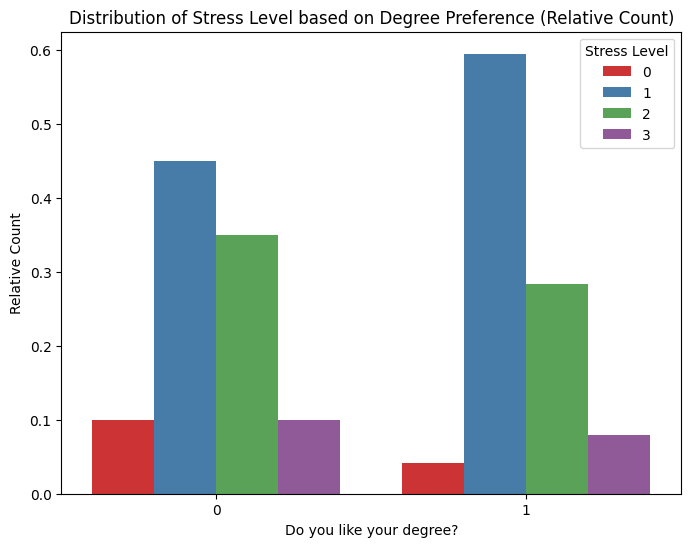

In [ ]:
# some more graphs that depicts the relation of two features at a time
# Plotting 'do like your degree?' and 'Stress Level' with relative counts
# Calculate relative count
relative_count = data_encoded.groupby('Do you like your degree?')['Stress Level'].value_counts(normalize=True).reset_index(name='Relative Count')

# Plotting 'Do you like your degree?' vs 'Stress Level' with relative count
plt.figure(figsize=(8, 6))
sns.barplot(x='Do you like your degree?', y='Relative Count', hue='Stress Level', data=relative_count, palette='Set1')
plt.title('Distribution of Stress Level based on Degree Preference (Relative Count)')
plt.xlabel('Do you like your degree?')
plt.ylabel('Relative Count')
plt.legend(title='Stress Level')
plt.show()


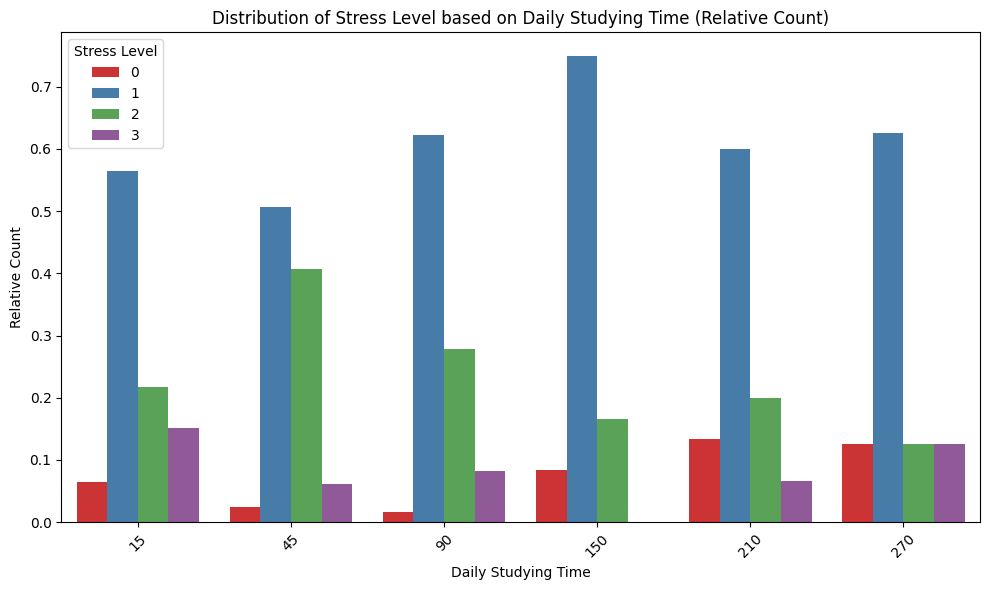

In [ ]:
# Plotting 'daily studing time' and 'Stress Level'with relative counts
# Calculate relative count
relative_count_study_time = data_encoded.groupby('daily studing time')['Stress Level'].value_counts(normalize=True).reset_index(name='Relative Count')

# Plotting 'Daily Studying Time' vs 'Stress Level' with relative count
plt.figure(figsize=(10, 6))
sns.barplot(x='daily studing time', y='Relative Count', hue='Stress Level', data=relative_count_study_time, palette='Set1')
plt.title('Distribution of Stress Level based on Daily Studying Time (Relative Count)')
plt.xlabel('Daily Studying Time')
plt.ylabel('Relative Count')
plt.legend(title='Stress Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

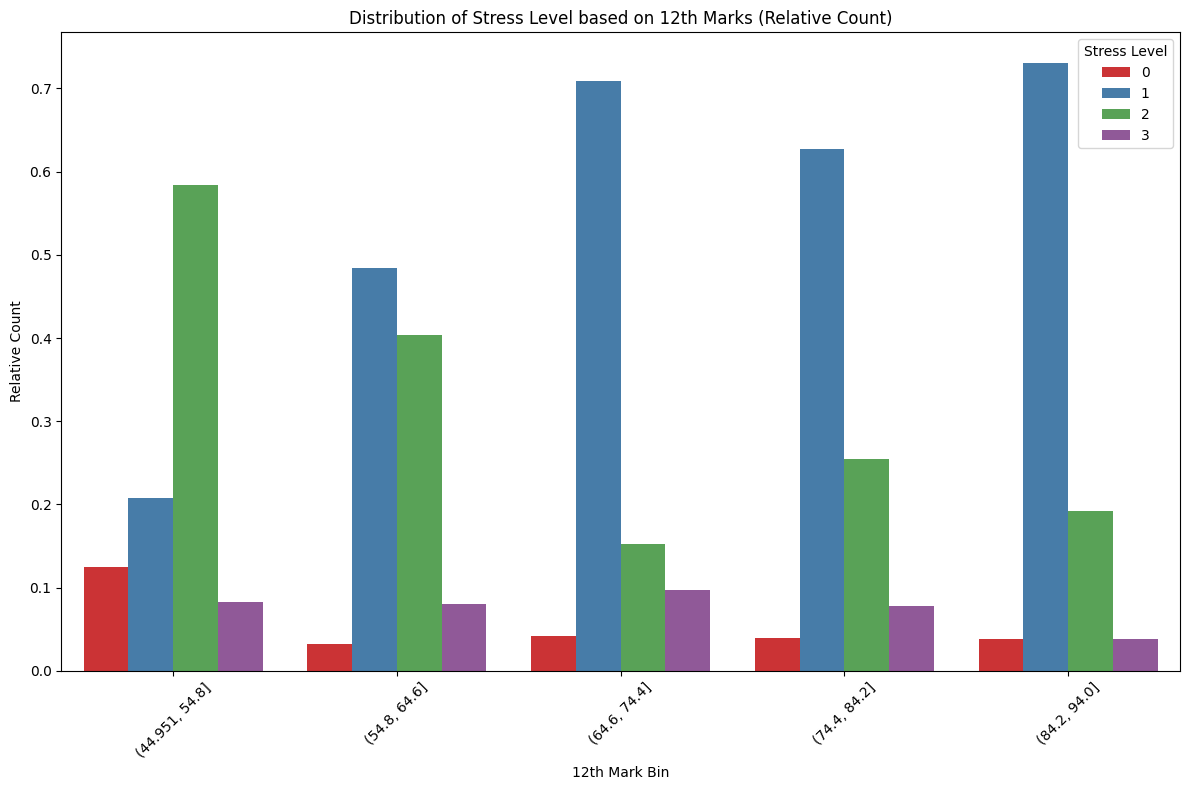

In [ ]:
# Define the number of bins for '12th Mark'
num_bins = 5

# Bin '12th Mark' values
data_encoded['12th Mark Bin'] = pd.cut(data_encoded['12th Mark'], bins=num_bins)

# Calculate relative count of 'Stress Level' within each bin
relative_count_12th_mark = data_encoded.groupby('12th Mark Bin')['Stress Level'].value_counts(normalize=True).reset_index(name='Relative Count')

# Plotting 'Stress Level' vs '12th Mark' with relative count
plt.figure(figsize=(12, 8))
sns.barplot(x='12th Mark Bin', y='Relative Count', hue='Stress Level', data=relative_count_12th_mark, palette='Set1')
plt.title('Distribution of Stress Level based on 12th Marks (Relative Count)')
plt.xlabel('12th Mark Bin')
plt.ylabel('Relative Count')
plt.legend(title='Stress Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [ ]:
data_encoded=data_encoded.drop(['12th Mark Bin'],axis=1)

# 04. Applying ML Models (DT , Random Forest and KNN), their perfomances and analysis and Feature Engineering


In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
features = data_encoded.drop(['Stress Level'], axis=1)
target = data_encoded['Stress Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# cross-validation score
cross_val_score(dt_classifier,features,target, cv=10)

Accuracy: 0.46808510638297873

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.70      0.50      0.58        28
           2       0.39      0.58      0.47        12
           3       0.00      0.00      0.00         3

    accuracy                           0.47        47
   macro avg       0.32      0.33      0.32        47
weighted avg       0.53      0.47      0.49        47


Confusion Matrix:
[[ 1  2  1  0]
 [ 3 14  8  3]
 [ 1  3  7  1]
 [ 0  1  2  0]]


array([0.41666667, 0.5       , 0.54166667, 0.41666667, 0.375     ,
       0.43478261, 0.47826087, 0.47826087, 0.52173913, 0.7826087 ])

Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# cross validation score
cross_val_score(clf,features,target, cv=10)

Accuracy: 0.5957446808510638

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75        28
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         3

    accuracy                           0.60        47
   macro avg       0.15      0.25      0.19        47
weighted avg       0.35      0.60      0.44        47


Confusion Matrix:
[[ 0  4  0  0]
 [ 0 28  0  0]
 [ 0 12  0  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.54166667, 0.5       , 0.5       , 0.5       , 0.5       ,
       0.47826087, 0.56521739, 0.56521739, 0.56521739, 0.60869565])

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Define features and target variable
X = data_encoded.drop(['Stress Level'], axis=1)
y = data_encoded['Stress Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# cross validation score
cross_val_score(rf_classifier,features,target, cv=10)

Accuracy: 0.6808510638297872

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.69      0.89      0.78        28
           2       0.60      0.50      0.55        12
           3       0.00      0.00      0.00         3

    accuracy                           0.68        47
   macro avg       0.57      0.41      0.43        47
weighted avg       0.65      0.68      0.64        47


Confusion Matrix:
[[ 1  2  1  0]
 [ 0 25  3  0]
 [ 0  6  6  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.54166667, 0.54166667, 0.58333333, 0.66666667, 0.45833333,
       0.52173913, 0.52173913, 0.7826087 , 0.73913043, 0.73913043])

In [ ]:
# apply KNN algorithm
from sklearn.neighbors import KNeighborsClassifier



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize KNN Classifier with k=5 (default)
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# cross validation score
cross_val_score(knn_classifier,features,target, cv=10)


Accuracy: 0.6170212765957447

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.89      0.75        28
           2       0.50      0.33      0.40        12
           3       0.00      0.00      0.00         3

    accuracy                           0.62        47
   macro avg       0.29      0.31      0.29        47
weighted avg       0.51      0.62      0.55        47


Confusion Matrix:
[[ 0  4  0  0]
 [ 0 25  3  0]
 [ 0  8  4  0]
 [ 0  2  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.58333333, 0.625     , 0.58333333, 0.58333333, 0.45833333,
       0.56521739, 0.60869565, 0.65217391, 0.52173913, 0.65217391])

# 5. Perform Some Feature Engineering to increase accuracy (which is not achieved )

In [ ]:
pd.DataFrame({"Features": features.columns.tolist(), 'random_forest_imp':rf_classifier.feature_importances_}).sort_values(by=['random_forest_imp'])

,Features,random_forest_imp
20,Department_B.com ISM,0.005680
27,part-time job_No,0.008551
28,part-time job_Yes,0.009009
26,hobbies_Video Games,0.009575
24,hobbies_Reading books,0.009793
17,Gender_Female,0.010639
18,Gender_Male,0.012176
25,hobbies_Sports,0.013074
7,Do you like your degree?,0.014341
22,Department_Commerce,0.015800


In [ ]:
X1 = features.drop(['Department_B.com ISM','part-time job_No','part-time job_Yes','hobbies_Video Games','hobbies_Reading books'], axis =1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,y, test_size=0.20)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

0.46808510638297873

=> accuracy is not improved by above type of feature engineering

In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# cross validation score
cross_val_score(model,X1,y, cv=10)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.74      0.61      0.67        28
           2       0.33      0.42      0.37        12
           3       0.00      0.00      0.00         3

    accuracy                           0.47        47
   macro avg       0.27      0.26      0.26        47
weighted avg       0.53      0.47      0.49        47


Confusion Matrix:
[[ 0  1  2  1]
 [ 1 17  7  3]
 [ 0  4  5  3]
 [ 1  1  1  0]]


array([0.5       , 0.625     , 0.5       , 0.5       , 0.375     ,
       0.43478261, 0.47826087, 0.52173913, 0.56521739, 0.86956522])

In [ ]:
X2=X1.drop(['Gender_Female','Gender_Male','hobbies_Sports','Do you like your degree?','Department_Commerce', 'Certification Course_No','Department_B.com Accounting and Finance ','prefer to study in_Anytime','Certification Course_Yes','hobbies_Cinema','Department_BCA','prefer to study in_Night','prefer to study in_Morning','Financial Status','willingness to pursue a career based on their degree','Travelling Time'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X2,y, test_size=0.20)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

0.6595744680851063

In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# cross validation score
cross_val_score(model,X2,y, cv=10)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.57      0.71      0.63        28
           2       0.20      0.17      0.18        12
           3       0.00      0.00      0.00         3

    accuracy                           0.47        47
   macro avg       0.19      0.22      0.20        47
weighted avg       0.39      0.47      0.42        47


Confusion Matrix:
[[ 0  2  2  0]
 [ 1 20  6  1]
 [ 0 10  2  0]
 [ 0  3  0  0]]


array([0.45833333, 0.54166667, 0.25      , 0.5       , 0.45833333,
       0.52173913, 0.34782609, 0.65217391, 0.60869565, 0.69565217])

# Conclusion: From Descision Tree, Random Forest and KNN models, Random forest gives better accuracy as compared to other models.